# Daten laden
Zuerst laden wir die Daten in unsere Python-Umgebung. Dafür brauchen wir zuerst die entsprechenden Librarys, die uns das ermöglichen. Prinzipiell sollten zu Beginn eines Skriptes alle notwendigen Librarys geladen werden. 

Wir laden die Librarys mit einem entsprechenden Kürzel, das macht die spätere Programmierung einfacher, da wir nicht immer den ganzen Namen ausschreiben müssen. Dies ist gängige Praxis, sodass die verwendeten Kürzel auch den allgemein verwendeten Kürzeln entsprechen. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
from tqdm import tqdm

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10


Nun können wir mit dem Datenimport beginnen. Dies geschieht zunächst mit der Library Pandas. Es ist eine Datenbankenlibrary, ähnlich wie Excel, die uns erlaubt, Tabellen mit unterschiedlichen Dateninhalt zu erstellen. Somit können wir Spalten und Zeilen mit Namen (Strings) versehen, während in den entsprechenden Spalten anschließend Zahlenwerte (Ganze Zahlen: Integer, Kommazahlen: Float) aufgelistet sind. Genau das haben wir bei den Daten vorliegen und muss entsprechend beim Einlesen der Daten berücksichtigt werden. Beispiele wären hier, ob sich bereits in der ersten Zeile Überschriften befinden oder ob die Datenwerte durch ein Komma oder ein Leerzeichen getrennte werden, was dann genauer im Read-Befehl definiert wird. Außerdem müssen wir den Pfad definieren, in dem die Daten liegen. Es wird immer vom Ordner ausgegangen, in dem sich das Skript befindet. Um eine Ordnerebene weiter nach oben zu gehen, verwendet man zwei Punkte (../).  

Zusätzlich speichern wird die eingeladen Daten direkt in einer Variabel, um später auf sie zurückgreifen zu können. 

In [2]:
nox_lab = pd.read_csv("Daten/NOx-lab.csv", delimiter=",", header=0)
noxo3 = pd.read_csv("Daten/NOxO3.csv", delimiter=",", header=0)

Mit dem Befehl "print" kann man sich im Allgemeinen Werte in Python ausgeben lassen. Der Befehl "head(x)" definiert, dass wir uns nicht alles ausgeben lassen wollen, sondern nur die ersten x Zeilen. Um zu überprüfen, ob wir die Daten richtig eingelesen haben, lassen wir uns beide Variablen ausgeben:

In [3]:
print("NOX_Lab Daten: ",nox_lab.head(10))
print("NOxO3 Daten: ", noxo3.head(10))

NOX_Lab Daten:               date/time     NO2      NO     NOx
0  2020-09-22 14:52:24  0.0098  0.0007  0.0105
1  2020-09-22 14:52:29  0.0097  0.0007  0.0104
2  2020-09-22 14:52:34  0.0097  0.0007  0.0104
3  2020-09-22 14:52:39  0.0097  0.0007  0.0104
4  2020-09-22 14:52:44  0.0098  0.0007  0.0105
5  2020-09-22 14:52:49  0.0098  0.0007  0.0105
6  2020-09-22 14:52:54  0.0097  0.0007  0.0104
7  2020-09-22 14:52:59  0.0096  0.0008  0.0104
8  2020-09-22 14:53:04  0.0096  0.0008  0.0104
9  2020-09-22 14:53:09  0.0096  0.0008  0.0104
NOxO3 Daten:               date/time   NOx  NO2     O3   NO
0  2020-09-22 14:52:22   NaN  NaN  27.02  NaN
1  2020-09-22 14:52:24  10.5  9.8    NaN  0.7
2  2020-09-22 14:52:27   NaN  NaN  27.02  NaN
3  2020-09-22 14:52:29  10.4  9.7    NaN  0.7
4  2020-09-22 14:52:33   NaN  NaN  26.74  NaN
5  2020-09-22 14:52:34  10.4  9.7    NaN  0.7
6  2020-09-22 14:52:37   NaN  NaN  26.61  NaN
7  2020-09-22 14:52:39  10.4  9.7    NaN  0.7
8  2020-09-22 14:52:42   NaN  NaN  26.4

Wir sehen, dass in den Datensätzen jeweils ein Zeitstempel enthalten ist. Der NOX_Lab Datensatz scheint äquidistante Zeitschritte mit einem Abstand von 5 Sekunden zu besitzen, während der NOxO3 Datensatz früher beginnt, hochauflösender ist und nicht aquidistant erscheint. Ansonsten scheinen die NOX_Lab Daten vollständig gefüllt zu sein, während bei den NOxO3 Daten Werte fehlen (NaN = Not a Number). 

Um einen besseren Überblick über die Daten zu erhalten, können wir uns die Größe der Dataframes in Matrixschreibweise mit dem Befehl "shape" ausgeben lassen. 

In [4]:
print("NOX_Lab Shape: ", nox_lab.shape)
print("NOxO3 Shape: ", noxo3.shape)

NOX_Lab Shape:  (16963, 4)
NOxO3 Shape:  (1758507, 5)


 Um zu überprüfen, ob die Datensätze wirklich äquidistant sind, kann man den Zeitschritt über eine feste Schrittweite plotten. Ein linearer Verlauf bedeutet äquidistante Zeitschritte, Abweichungen von einem linearen Verlauf bedeuten das Gegenteil.

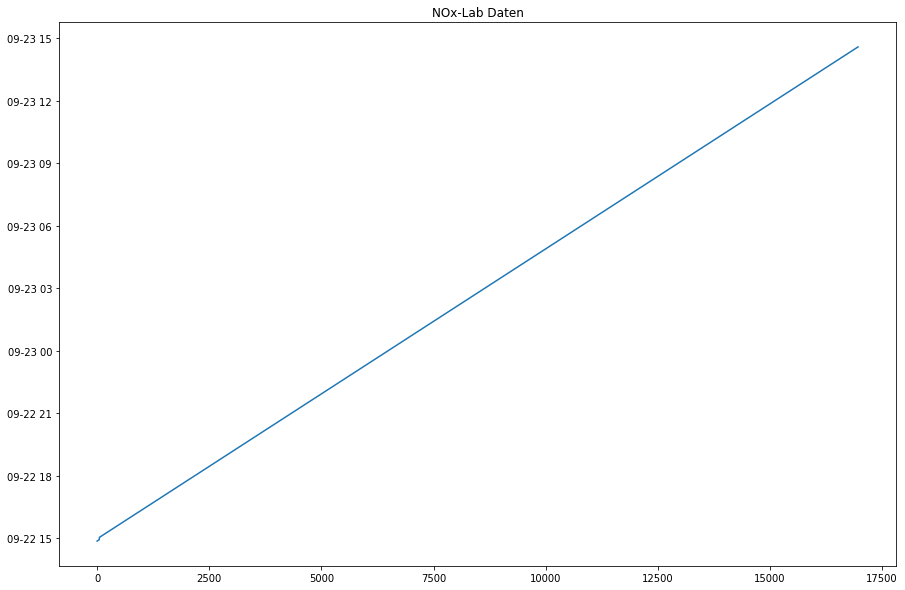

In [5]:
nox_lab_timestamp = nox_lab.iloc[:, 0]
x = range(len(nox_lab))
nox_lab_time = [datetime.datetime.strptime(elem, "%Y-%m-%d %H:%M:%S") for elem in nox_lab_timestamp]
plt.plot(x, nox_lab_time)
plt.title("NOx-Lab Daten")
plt.show()

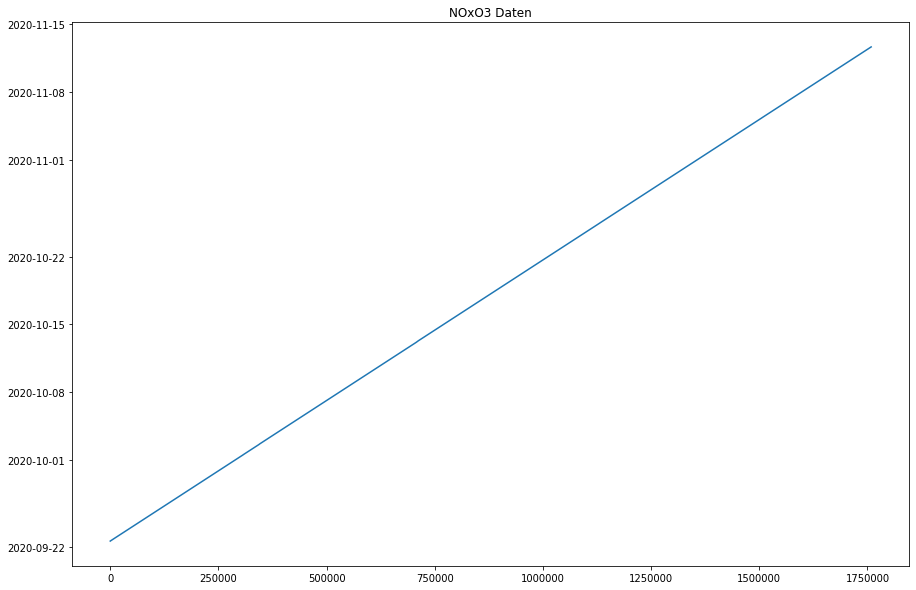

In [6]:
noxo3_timestamp = noxo3.iloc[:, 0]
x = range(len(noxo3))
noxo3_time = [datetime.datetime.strptime(elem, "%Y-%m-%d %H:%M:%S") for elem in noxo3_timestamp]
plt.plot(x, noxo3_time)
plt.title("NOxO3 Daten")
plt.show()

Scheint so, als könnte Python die unterschiedlichen Zeitschritte in den NOxO3 Daten handeln. 

Schaut an sich die Daten genauer an, erkennt man, dass bei den NOx3 Daten O3 immer 2 Sekunden früher gemessen wurde und anschließend in der Messung der restlichen Werte fehlt. Um einen identischen Zeitstempel für die zwei Datensätze zu erreichen, wird der zuvor gemessene O3 Wert mit der folgenden Funktion in den fehlenden O3 Messwert der darauffolgenden Messung eingetragen (stimmt so leider noch nicht ganz). 

Fangen wir an, die Daten zu plotten:

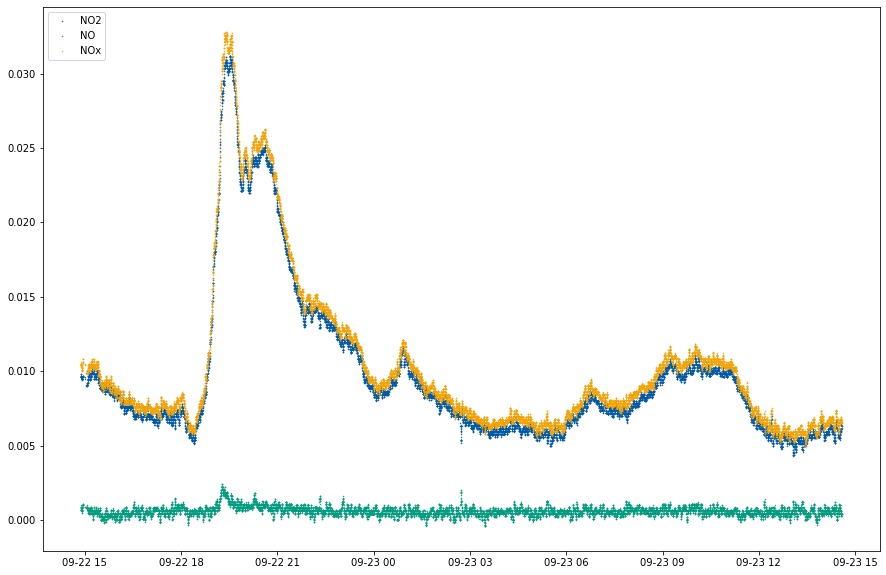

In [26]:
plt.plot_date(md.date2num(nox_lab_time), nox_lab.iloc[:, 1], '.', color="#005AA9", label="NO2", markersize=1)
plt.plot_date(md.date2num(nox_lab_time), nox_lab.iloc[:, 2], '.', color="#009D81", label="NO", markersize=1)
plt.plot_date(md.date2num(nox_lab_time), nox_lab.iloc[:, 3], '.', color="#F5A300", label="NOx", markersize=1)
plt.legend(loc="upper left")
plt.show()

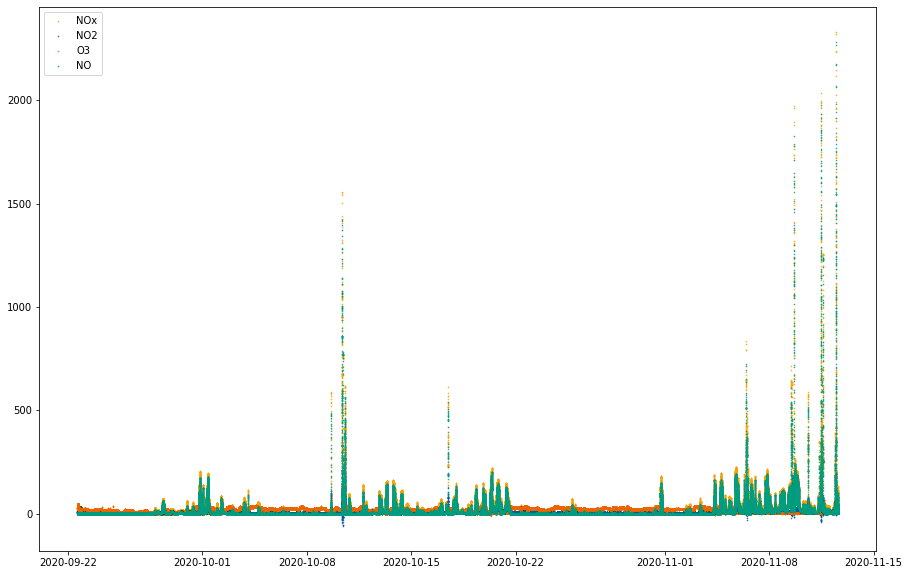

In [27]:
plt.plot_date(md.date2num(noxo3_time), noxo3.iloc[:, 1], '.', color="#F5A300", label="NOx", markersize=1)
plt.plot_date(md.date2num(noxo3_time), noxo3.iloc[:, 2], '.', color="#005AA9", label="NO2", markersize=1)
plt.plot_date(md.date2num(noxo3_time), noxo3.iloc[:, 3], '.', color="#EC6500", label="O3", markersize=1)
plt.plot_date(md.date2num(noxo3_time), noxo3.iloc[:, 4], '.', color="#009D81", label="NO", markersize=1)
plt.legend(loc="upper left")
plt.show()

Daten besitzen unterschiedliche Zeitachsen, wie war das bei der Versuchsdurchführung? 
Werte bei noxo3 daten unrealistisch (über 2000?) 